# Problem Statement
Write a program to implement Simplified Data Encryption Standard (S–DES)

#S-DES Key Points

* Simplified Data Encryption Standard
* developed by Professor Edward Schaefer of Santa Clara University
* similar properties and structure to DES with much smaller parameters
* designed for educational purposes
* symmetric key algorithm
* block cipher key
* key - shared secret

* Encryption
  * Input - 8 bit plain text, 10 bit key
  * Output - 8 bit cipher text

* Decryption
  * Input - 8 bit cipher text, 10 bit key
  * Output - 8 bit plain text

* Five functions of encryption and decryption
  * IP - initial permutation
  * fk - complex function involving permutation and substitution operations, depends on a key input
  * sw - swapping function of the right and left bits
  * fk - same function as above, albeit with a different key input
  * IP_inverse - inverse of initial permutation

* The 10 bit key in turn produces two subkeys k1 and k2, which are used once for each occurence of fk function during encryption and decryption

* Mathematical Notations
  * ciphertext = IP-1 (fK2 (SW (fK1 (IP(plaintext)))))
  * plaintext = IP-1 (fK2 (SW (fK1 (IP(ciphertext)))))
  * K1 = P8(Shift(P10(key)))
  * K2 = P8(Shift(Shift(P10(key))))

* Advantages
  * easily comprehendable, useful for educational purposes

* Disadvantages
  * Not fit for security encryption
  * A brute-force attack on 10-bit key is certainly feasible
  * shared secret

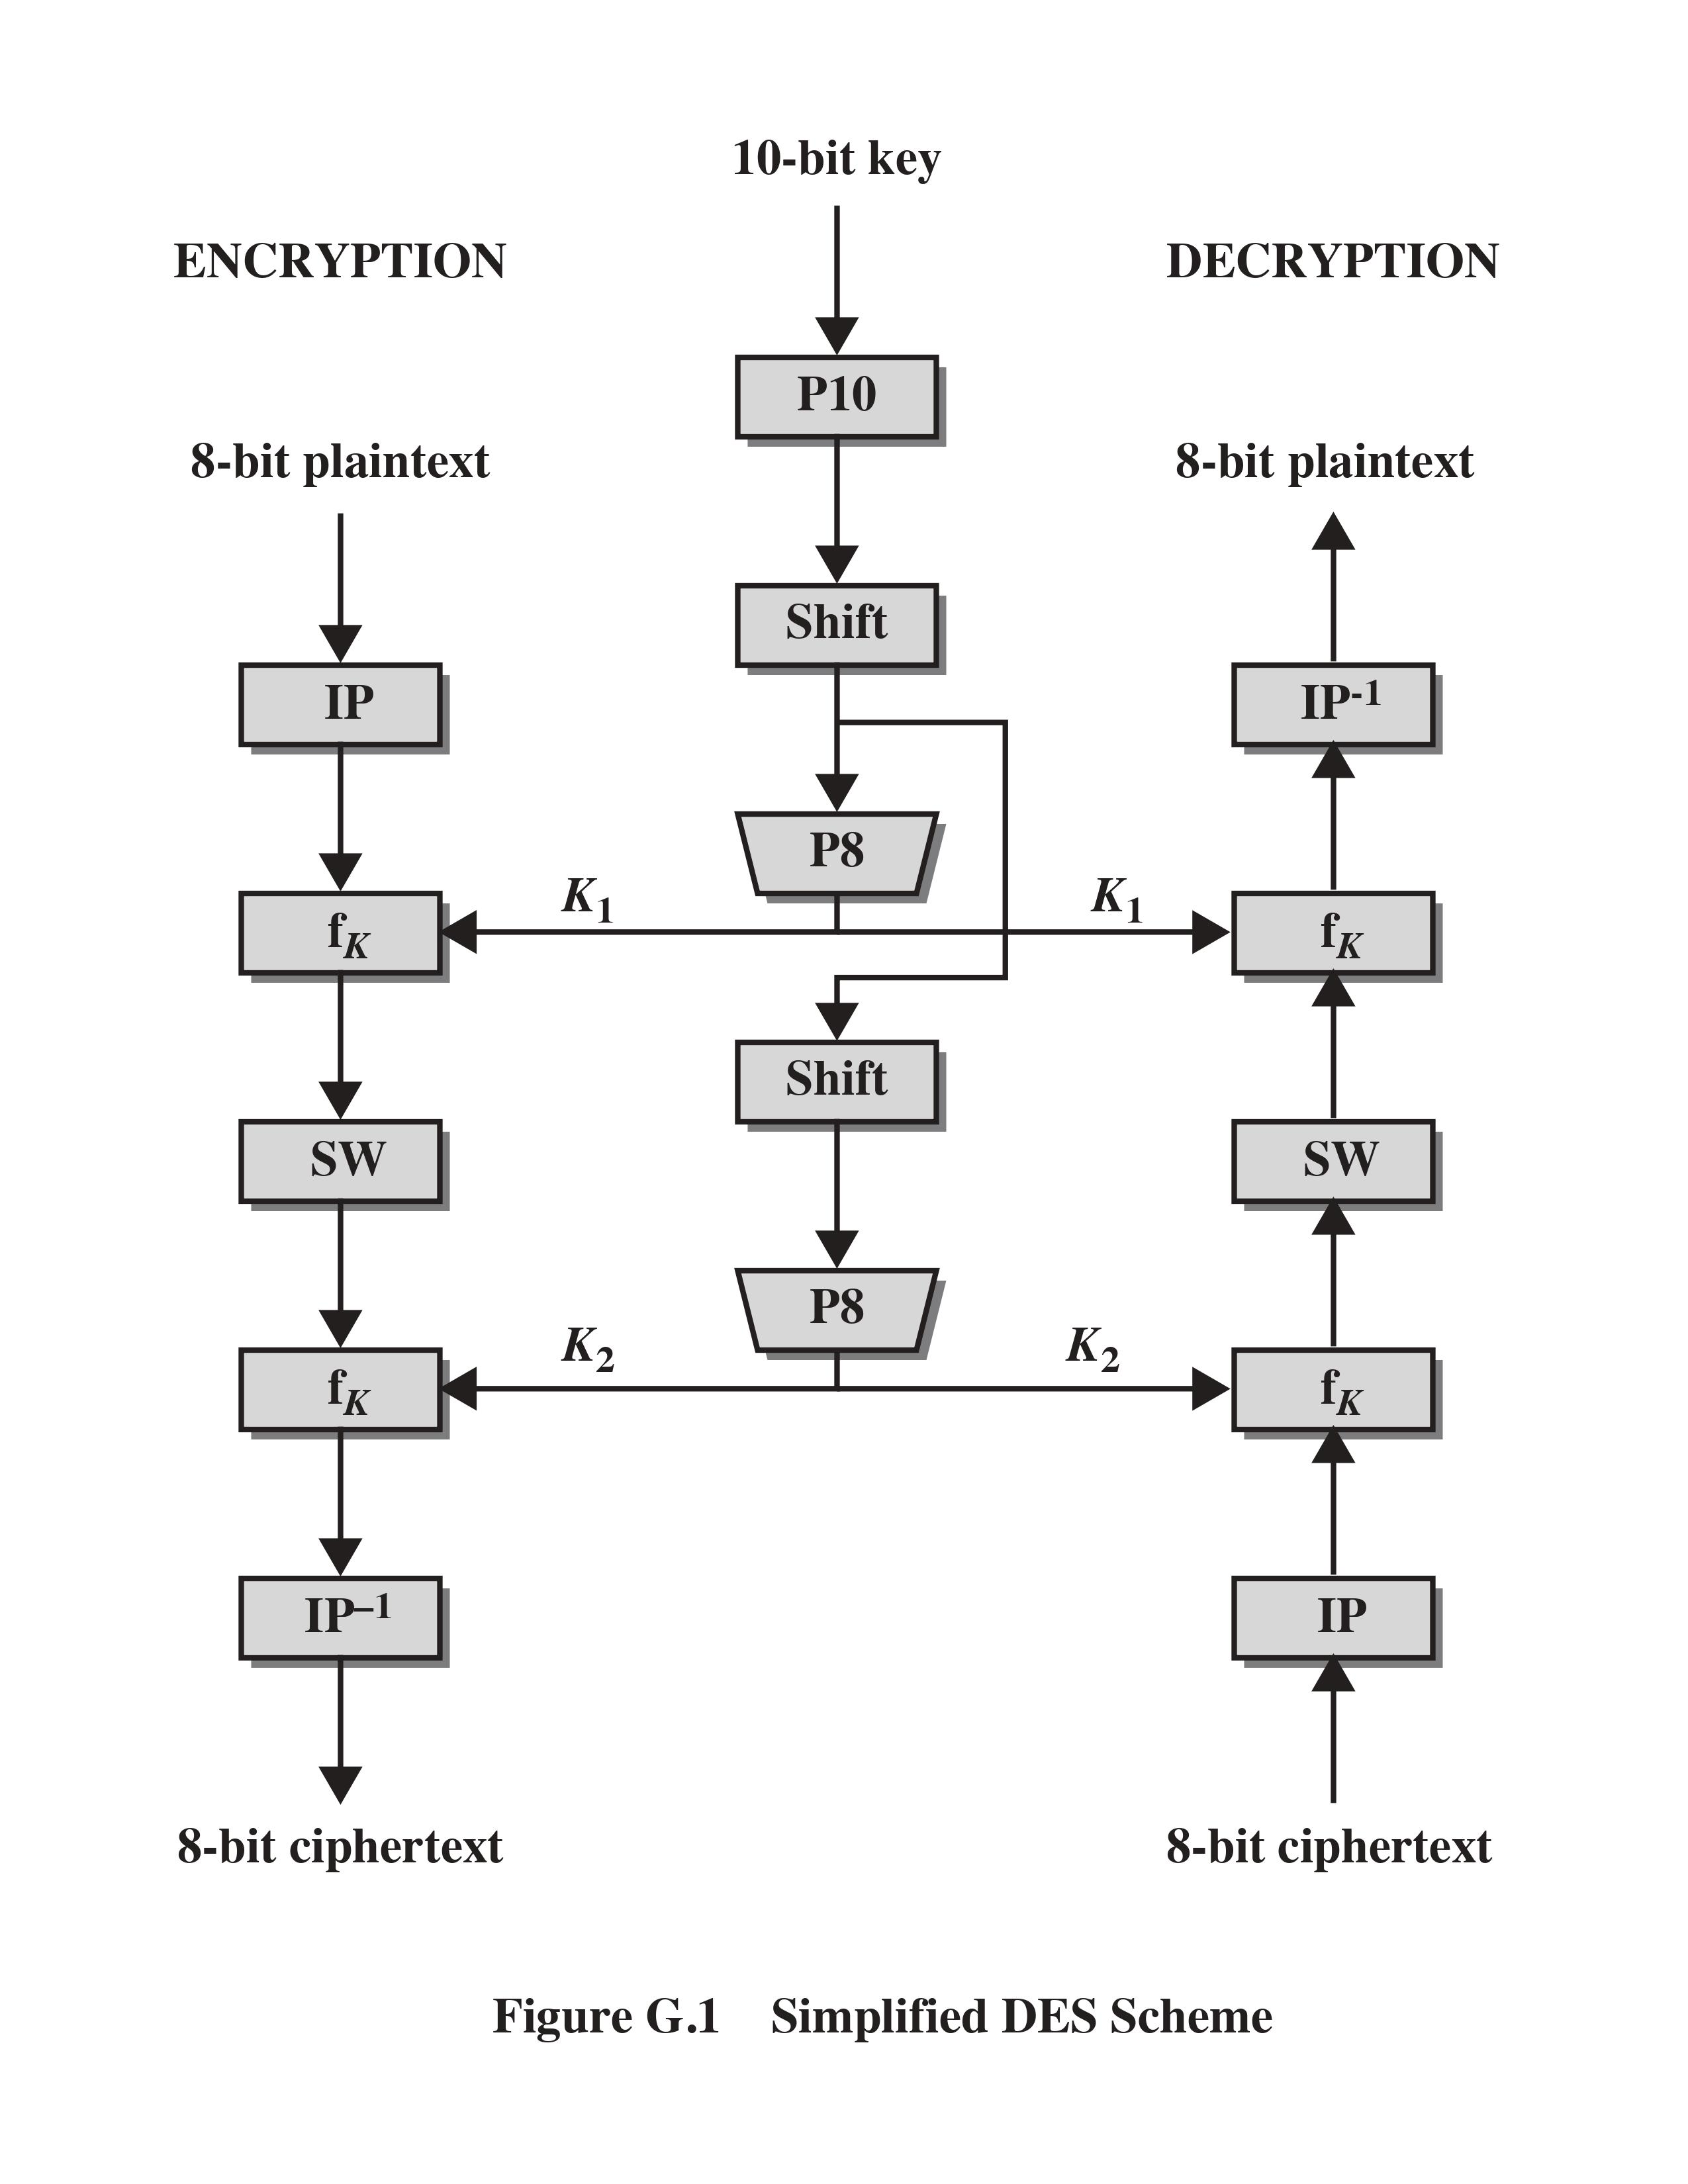

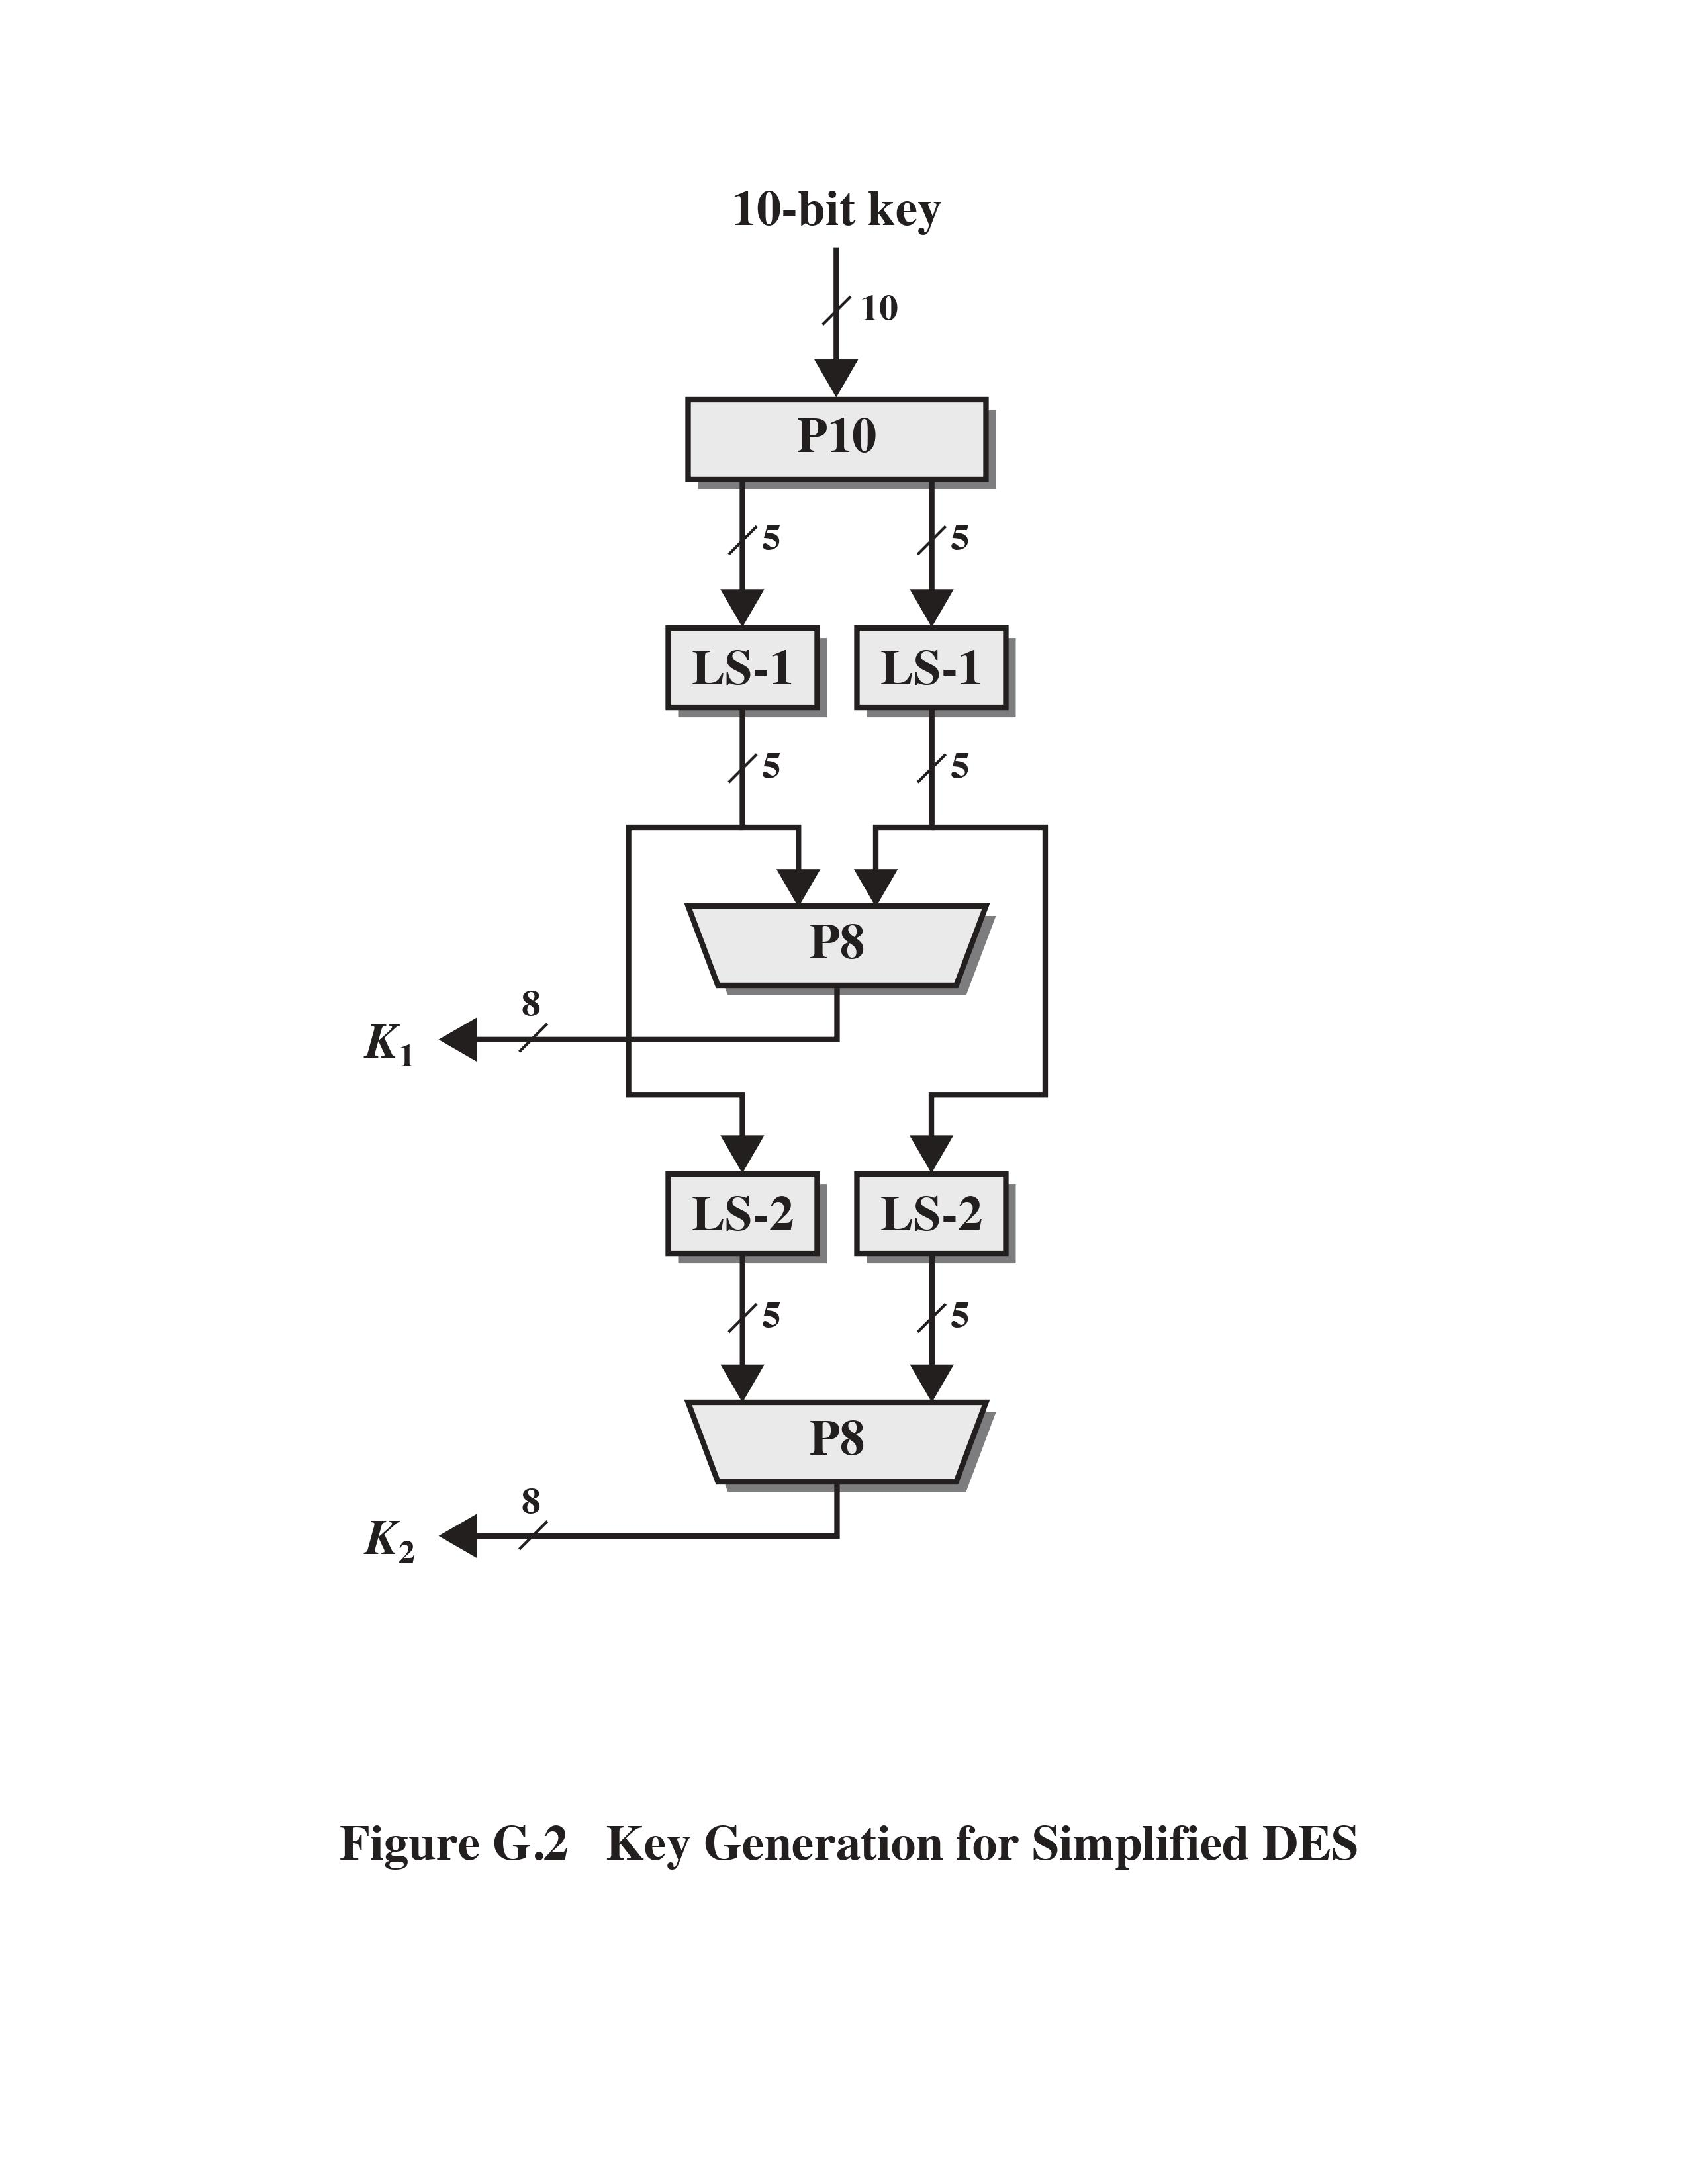

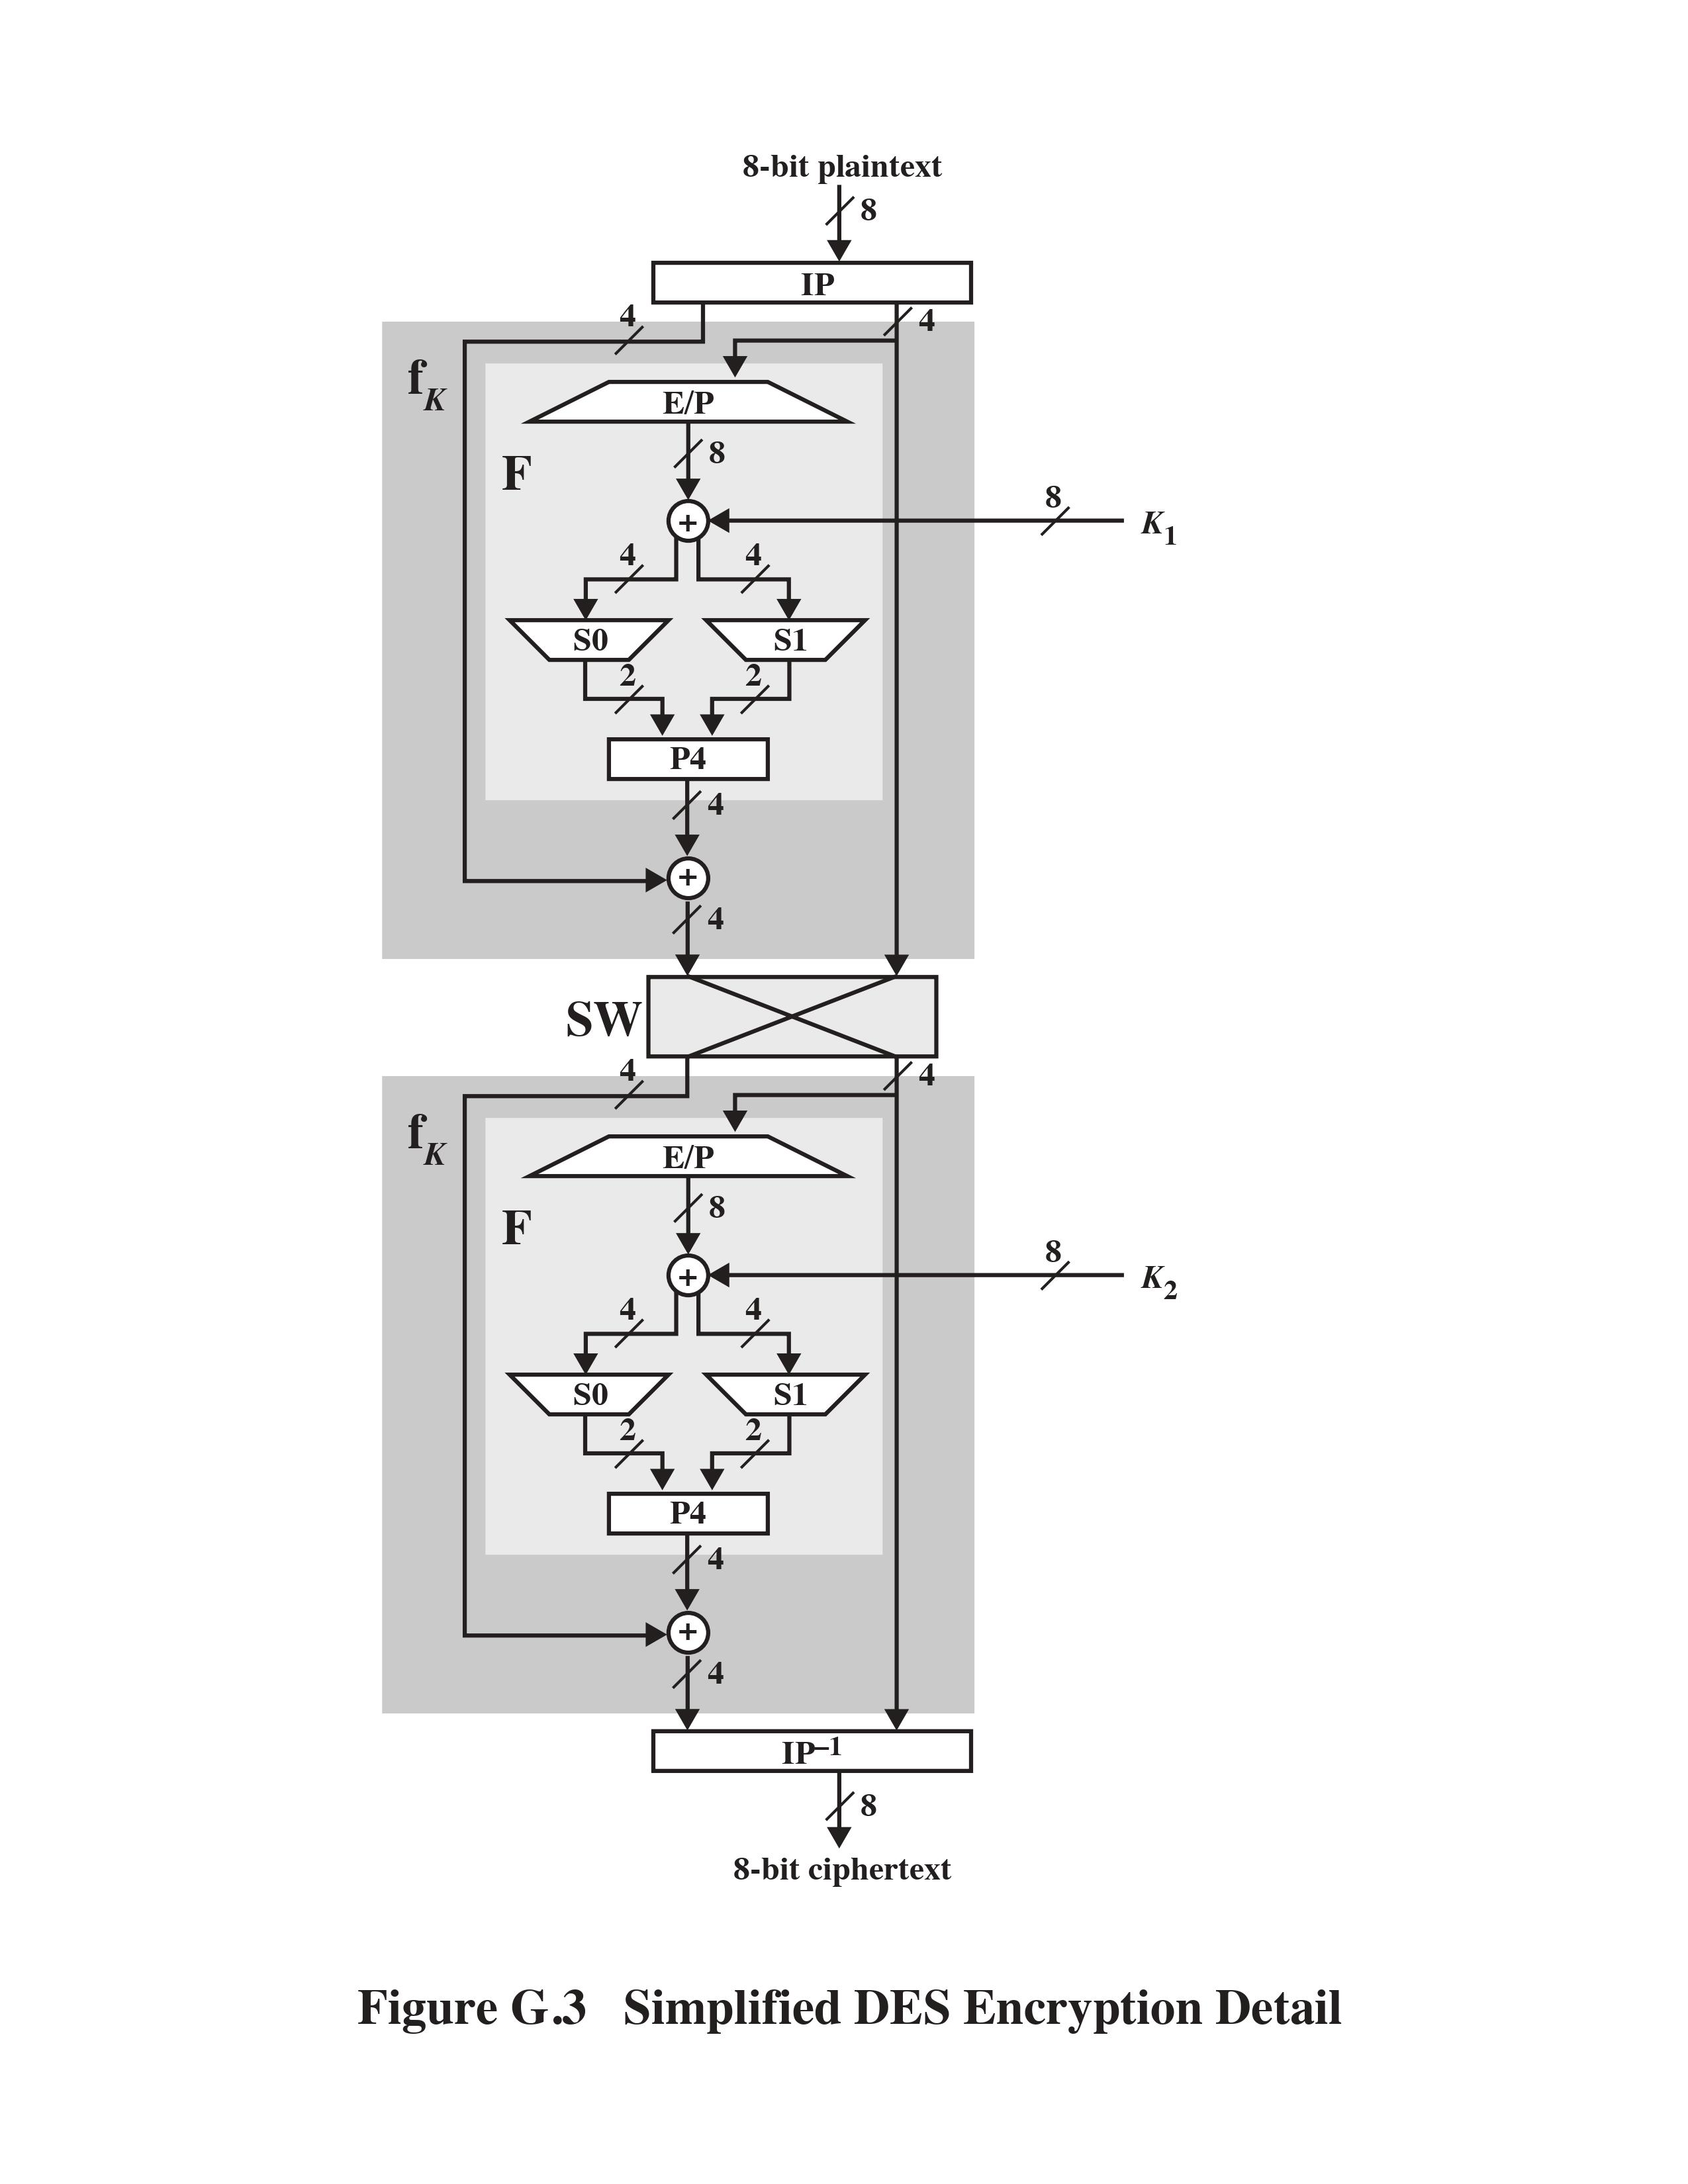

In [1]:
# Helper Functions

def _permutation_block(permutation_matrix, bits):
  return [ bits[old_index] for old_index in permutation_matrix ]

def _left_shift(bits, count=1):
  return bits[0+count:] + bits[0:0+count]

def _xor(operand1, operand2):
  return [ bit1^bit2 for bit1, bit2 in zip(operand1, operand2) ]

def _p10(bits):
  return _permutation_block([2, 4, 1, 6, 3, 9, 0, 8, 7, 5], bits)

def _p8(bits):
  return _permutation_block([5, 2, 6, 3, 7, 4, 9, 8], bits)

def _shift(bits, count=1):
  left = bits[0:int(len(bits)/2)]
  right = bits[int(len(bits)/2):]
  result = _left_shift(left,1) + _left_shift(right,1)
  return result

def _fk(subkey, bits):
  
  left = bits[0:4]
  right = bits[4:]

  expansion_permutation = [3,0,1,2,1,2,3,0]
  ep = _permutation_block(expansion_permutation, right)

  xor_output = _xor(ep, subkey)

  s0 = [
        [1,0,3,2],
        [3,2,1,0],
        [0,2,1,3],
        [3,1,3,2]
  ]
  s1 = [
        [0,1,2,3],
        [2,0,1,3],
        [3,0,1,0],
        [2,1,0,3]
  ]

  xor_left = xor_output[0:4]
  row = 2*xor_left[0] + xor_left[3]
  col = 2*xor_left[1] + xor_left[2]
  s0_output_num = s0[row][col]
  s0_output_bits = [int(s0_output_num/2), s0_output_num%2]

  xor_right = xor_output[4:]
  row = 2*xor_right[0] + xor_right[3]
  col = 2*xor_right[1] + xor_right[2]
  s1_output_num = s1[row][col]
  s1_output_bits = [int(s1_output_num/2), s1_output_num%2]

  s_output_bits = s0_output_bits + s1_output_bits

  p4_matrix = [1,3,2,0]
  p4 = _permutation_block(p4_matrix, s_output_bits)

  final_left = _xor(p4, left)

  return final_left+right

def _sw(bits):
  return bits[int(len(bits)/2):] + bits[0:int(len(bits)/2)]

def _ip(bits):
  return _permutation_block([1,5,2,0,3,7,4,6], bits)

def _ip_inv(bits):
  return _permutation_block([3,0,2,4,6,1,7,5], bits)

In [2]:
# Class SDES

class SDES:

  def key_generation(self,key_bytearray):
    p10 = _p10(key_bytearray)
    ls1 = _shift(p10, 1)
    k1 = _p8(ls1)
    ls2 = _shift(ls1, 2)
    k2 = _p8(ls2)
    return k1, k2

  def encryption(self,plain_text_bytearray, key_bytearray):
    k1, k2 = self.key_generation(key_bytearray)
    ip = _ip(plain_text_bytearray)
    fk1 = _fk(k1, ip)
    sw = _sw(fk1)
    fk2 = _fk(k2, sw)
    cipher_text_bytearray = _ip_inv(fk2)
    return cipher_text_bytearray

  def decryption(self,cipher_text_bytearray, key_bytearray):
    k1, k2 = self.key_generation(key_bytearray)
    ip = _ip(cipher_text_bytearray)
    fk2 = _fk(k2, ip)
    sw = _sw(fk2)
    fk1 = _fk(k1, sw)
    decrypted_text_bytearray = _ip_inv(fk1)
    return decrypted_text_bytearray

In [3]:
# Execution (Byte Level)

def sample_execution():
  sdes = SDES()
  key_bytearray = [1,0,1,0,0,0,0,0,1,0]
  plain_text_bytearray = [1,0,0,1,0,1,1,1]
  cipher_text_bytearray = sdes.encryption(plain_text_bytearray, key_bytearray)
  decrypted_text_bytearray = sdes.decryption(cipher_text_bytearray, key_bytearray)
  print('10 bit Key =',key_bytearray)
  print('8 bit Plain Text ByteArray =',plain_text_bytearray)
  print('8 bit Cipher Text ByteArray =',cipher_text_bytearray)
  print('8 bit Decrypted Text ByteArray =',decrypted_text_bytearray)

sample_execution()

10 bit Key = [1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
8 bit Plain Text ByteArray = [1, 0, 0, 1, 0, 1, 1, 1]
8 bit Cipher Text ByteArray = [1, 0, 1, 1, 1, 0, 0, 0]
8 bit Decrypted Text ByteArray = [1, 0, 0, 1, 0, 1, 1, 1]


In [4]:
# Encryption of a string

def encrypt_text(plain_text, key_bytearray=[1,0,1,0,0,0,0,0,1,0]):

  sdes = SDES()
  encrypted_text = ''

  # For each character in plain_text
  for byte in bytearray(plain_text, "utf8"):
    
    # Get binary Representation
    binary_representation = bin(byte)

    # Remove the first two characters '0b'
    binary_representation = binary_representation[2:]

    # Pad with zero
    binary_representation = '0'*(8-len(binary_representation)) + binary_representation

    # Encrypt
    cipher_text_bytearray = sdes.encryption([int(x) for x in list(binary_representation)], key_bytearray)

    # Convert bytearray to character
    binary_representation_cipher = ''
    for digit in cipher_text_bytearray:
      binary_representation_cipher += str(digit)

    # Convert encoded text to utf-8
    encrypted_text += chr(int(binary_representation_cipher, 2))
    
  return encrypted_text


plain_text = "Sos1!"
cipher_text = encrypt_text(plain_text)
cipher_text

'Ë«c8\x8d'

In [5]:
# Decryption of a string

def decrypt_text(cipher_text, key_bytearray=[1,0,1,0,0,0,0,0,1,0]):

  sdes = SDES()
  decrypted_text = ''

  # For each character in cipher_text
  for character in cipher_text:
    
    # Convert utf-8 character to binary and remove '0b'
    binary_representation = bin(ord(character))[2:]

    # Padding
    binary_representation = '0'*(8-len(binary_representation)) + binary_representation
    
    # Decrypt
    decrypted_text_bytearray = sdes.decryption([int(x) for x in list(binary_representation)], key_bytearray)

    # Convert bytearray to character
    binary_representation_decrypted = ''
    for digit in decrypted_text_bytearray:
      binary_representation_decrypted += str(digit)

    # Convert encoded text to utf-8
    decrypted_text += chr(int(binary_representation_decrypted, 2))

  return decrypted_text


decrypted_text = decrypt_text(cipher_text)
decrypted_text

'Sos1!'

In [6]:
plain_text = 'Bad boys 4 life!'
cipher_text = encrypt_text(plain_text)
decrypted_text = decrypt_text(cipher_text)

print('Plain Text = ',plain_text)
print('Cipher Text = ',cipher_text)
print('Decrypted Text = ',decrypted_text)

Plain Text =  Bad boys 4 life!
Cipher Text =  }ù3Â«¦cÂÂ©Px
Decrypted Text =  Bad boys 4 life!
